In [1]:
#3장
#3.1.1 K-최근접 이웃

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
dataset = pd.read_csv('../chap03/data/iris.data', names=names)

In [2]:
X = dataset.iloc[:, :-1].values # 마지막 열을 제외한 특성을 X로
y = dataset.iloc[:, 4].values # 마지막 열을 target 값으로

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) # 8:2로 분할

In [3]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler() #평균 0, 표준편차가 1인  표준스케일러

X_train = s.fit_transform(X_train)
X_test = s.fit_transform(X_test)

In [4]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=50) # 50-최근접 이웃 모델
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=50)

In [5]:
from sklearn.metrics import accuracy_score
y_pred = knn.predict(X_test)
print("정확도: {}".format( accuracy_score(y_test, y_pred))) # train_test_split 분할이 무작위 > 정확도 달라짐

정확도: 0.8333333333333334


In [6]:
# 최적의 k 값 찾기 
k=10
acc_array=np.zeros(k)
for k in np.arange(1,k+1,1): 
    classifier = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train) 
    y_pred = classifier.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    acc_array[k-1]=acc 

max_acc=np.amax(acc_array)
acc_list=list(acc_array)
k=acc_list.index(max_acc)
print("정확도 ", max_acc, "으로 최적의 k는", k+1, "입니다.")

정확도  1.0 으로 최적의 k는 8 입니다.


In [8]:
#3.1.2 서포트 벡터 머신(SVM)

SVM사용자로서 꼭 알아야 할 것들, ML.chang 2019. 7. 29. 12:20, https://championprogram.tistory.com/282

- 가장 많이 사용되는 SVM은 radial basis funtion(RBF) 커널을 사용한 것
- 파라미터
    - ```cost(C)```:: 얼마나 많은 데이터 샘플이 다른 클래스에 놓이는 것을 허용하는가
        - C가 작으면 다른 클래스에 놓이는걸 허용 = 마진이 큰걸 허용, 과소적합될 수 있음

    - ```gamma```:: 하나의 데이터 샘플이 영향력을 행사하는 거리
        - gamma가 크면 한 데이터 포인트들이 영향력을 행사하는 거리가 짧다 (=가까운거만 인정하고 나머진 무시한다)
        - gamma가 작으면 거리가 멀어도 값으로 인정한다

> C : 커질수록 이상치의 존재 가능성을 낮게 본다.

>gamma : 결정 경계의 곡률을 조정한다고 말할 수도 있다. 

In [8]:
!py -3.9 -m pip install tensorflow


  Using cached wheel-0.45.1-py3-none-any.whl.metadata (2.3 kB)
   ---------------------------------------- 0.0/375.7 MB ? eta -:--:--
   ---------------------------------------- 0.5/375.7 MB 3.4 MB/s eta 0:01:52
   ---------------------------------------- 1.0/375.7 MB 4.2 MB/s eta 0:01:30
   ---------------------------------------- 2.4/375.7 MB 4.2 MB/s eta 0:01:30
   ---------------------------------------- 3.7/375.7 MB 4.6 MB/s eta 0:01:21
    --------------------------------------- 4.7/375.7 MB 4.8 MB/s eta 0:01:17
    --------------------------------------- 5.8/375.7 MB 4.8 MB/s eta 0:01:17
    --------------------------------------- 6.8/375.7 MB 4.7 MB/s eta 0:01:19
    --------------------------------------- 7.3/375.7 MB 4.6 MB/s eta 0:01:21
    --------------------------------------- 8.4/375.7 MB 4.5 MB/s eta 0:01:22
    --------------------------------------- 9.2/375.7 MB 4.5 MB/s eta 0:01:21
   - -------------------------------------- 10.2/375.7 MB 4.5 MB/s eta 0:01:22
   - --


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
# %pip install tensorflow

In [9]:
from sklearn import svm
from sklearn import metrics
from sklearn import datasets
from sklearn import model_selection

import tensorflow as tf
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [10]:
iris = datasets.load_iris()
x_train, x_test, y_train, y_test = model_selection.train_test_split(iris.data, 
                                                                    iris.target, 
                                                                    test_size=0.6, 
                                                                   random_state=42)

In [ ]:
svm = svm.SVC(kernel='linear', C=1.0, gamma=0.5) # 감마는 가까이 있는 점에 얼마나 가중치를 줄 것인가
# C가 크다 > 제약조건 > 오차 허용 적게 해야 > 과대 적합
svm.fit(x_train, y_train)
predictions = svm.predict(x_test)
score = metrics.accuracy_score(y_test, predictions)
print('정확도: {0:f}'.format(score))

정확도: 0.988889


Support Vector Machine, SVM, by Nowkeeh Ahc, 티스토리, https://chaheekwon.tistory.com/entry/Support-Vector-Machine-SVM-1


Kernel/Kernel trick(커널과 커널트릭),휴석사 2020. 6. 13. 17:49, https://sanghyu.tistory.com/14

교재 100페이지
1) 선형 커널 K(a,b) = a 전치 .b
 - 벡터 내적: 벡터의 유사도 관련성 파악 > 값이 클수록 유사도가 크다

2) 다항식 커널 K(a,b) = (r a전치.b)d차원
 - 1차원 데이터 x
- 2차원 데이터 [1,x, x2]

3) 가우시안 RBF 커널: K(a,b) = exp(-r||a-b||**2) # a-b는 두점사이의 거리
 - 큰 C: 하드 마진 > 오차 적다
 - 작은 C:소프트마진 > 오차 크다
 - 감마: 훈련 데이터에 얼마나 민감하게 반응

In [12]:
#3.1.3 의사결정 트리

Information Theory 이해하기 - 정보량과 Entropy
출처: https://memesoo99.tistory.com/38 [미미로그:티스토리]

- 정보량:: 내가 알아야할 정보량
    - 확률이 낮을수록 정보량이 높은 반비례 관계라고 생각할 수 있다. = 확률이 낮을수록 내가 알아야할 정보량이 많다

- 엔트로피:: 정보량에 대한 기댓값(불확실성), 어떤 사건에 대한 확률 분포의 정보량
    - H(x): 엔트로피
    - E: 기댓값
    - P(x): 확률
    - I(x): 정보량
    - 값이 높을수록 불확실성이 더 크다.

의사결정나무(Decision Tree) :: CART 알고리즘, 지니계수(Gini index)란? 슈퍼짱짱, 20,4,21, https://leedakyeong.tistory.com/entry/%EC%9D%98%EC%82%AC%EA%B2%B0%EC%A0%95%EB%82%98%EB%AC%B4Decision-Tree-CART-%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98-%EC%A7%80%EB%8B%88%EA%B3%84%EC%88%98Gini-Index%EB%9E%80

- 지니계수:: 불순도측정 지표, 불순도를 의미
    - 작을수록 불순도가 낮음

In [13]:
import pandas as pd
df = pd.read_csv('../chap03/data/titanic/train.csv', index_col='PassengerId')
print(df.head())

             Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId                                                          
1                1      0         A/5 21171   7.2500   NaN        S

In [14]:
df = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = df.dropna() 
X = df.drop('Survived', axis=1)
y = df['Survived']

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [16]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [17]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [18]:
y_predict = model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.8212290502793296

In [19]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=['Predicted Not Survival', 'Predicted Survival'],
    index=['True Not Survival', 'True Survival']
)

,Predicted Not Survival,Predicted Survival
True Not Survival,98,14
True Survival,18,49


confusion matrix를 통해 재현율(Recall), 정밀도(Precision), **정확도(Accuracy)**를 계산하는 방법

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score

# 예: 실제값과 예측값
y_true = [1, 0, 1, 1, 0, 1, 0, 0, 1, 0]
y_pred = [1, 0, 1, 0, 0, 1, 0, 1, 1, 0]

# 혼동 행렬
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)

# 정밀도, 재현율, 정확도
print("Precision:", precision_score(y_true, y_pred))
print("Recall:", recall_score(y_true, y_pred))
print("Accuracy:", accuracy_score(y_true, y_pred))


In [ ]:
#3.1.4 로지스틱 회귀

- 이산형 종속변수를 예측할 때 확률 추정 > 해당 결과가 발생할 가능성을 추정
- 확신이 없거나 불확실한 상황에서 확률 기반의 이진 분류 문제를 다룬다 
- 통계적 기법

5-6. 로지스틱 회귀분석(Logistic Regression), 19.3.3, 티스토리, https://nittaku.tistory.com/478

In [ ]:
- 로지스틱 회귀분석
    -

최대우도법: Maximum likelihood 
- likelihood 뜻: the chance that something will happen
- p(x) = 1/(1+e-(wx+b)) # P(x)를 최대로 주는 w,b를 구한다

최대 우도 추정법(Maximum Likelihood Estimation), 호재 P.B 2020. 9. 1. 00:53, https://everyday-tech.tistory.com/entry/%EC%B5%9C%EB%8C%80-%EC%9A%B0%EB%8F%84-%EC%B6%94%EC%A0%95%EB%B2%95Maximum-Likelihood-Estimation

- 통계학에서 중요한 것 중 하나가 샘플(표본)을 통해서 모집단(전체 집단)을 추정하는 것
- 모수를 추정할 때 가장 많이 사용하는 방법이 ``최대 우도 추정법``
    - 확률 : 분포가 정해지고, 분포의 모수가 정해졌을 때 __관측치가 나올 가능성__
    - 우도 : 분포가 정해지고, 관측치가 주어졌을 때 __모수가 나올 가능성__

In [20]:
%matplotlib inline
from sklearn.datasets import load_digits
digits = load_digits()
print("Image Data Shape" , digits.data.shape)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


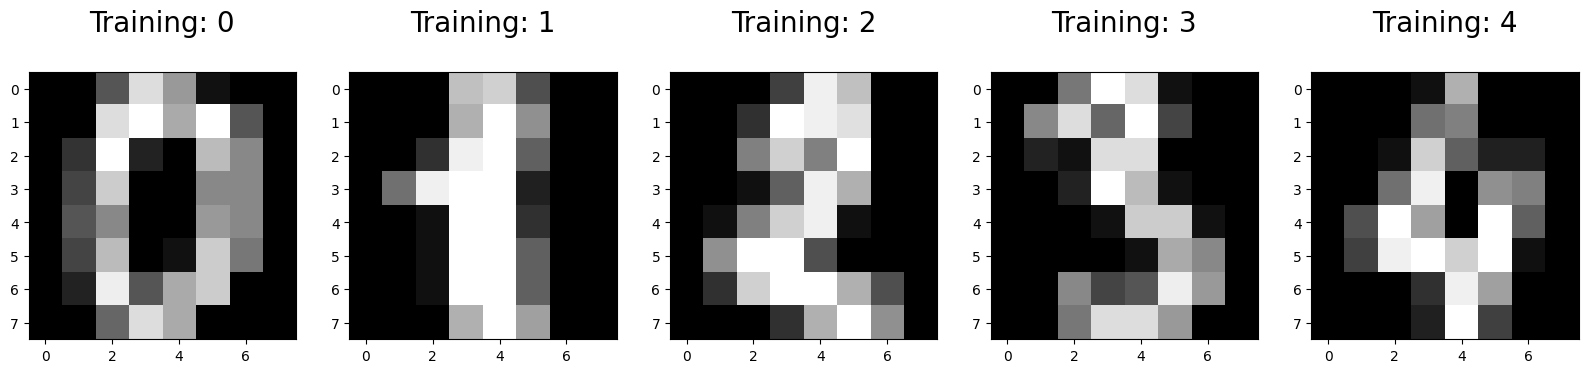

In [21]:
import numpy as np 
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression() #다중클래스 분류를 지원 > 여러개의 이진 분류기를 결합하여
# 각 클래스스(0~9)에 대한 이진 분류기 학습
logisticRegr.fit(x_train, y_train)

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
logisticRegr.predict(x_test[0].reshape(1,-1))
logisticRegr.predict(x_test[0:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [24]:
predictions = logisticRegr.predict(x_test)
score = logisticRegr.score(x_test, y_test)
print(score)

0.9511111111111111


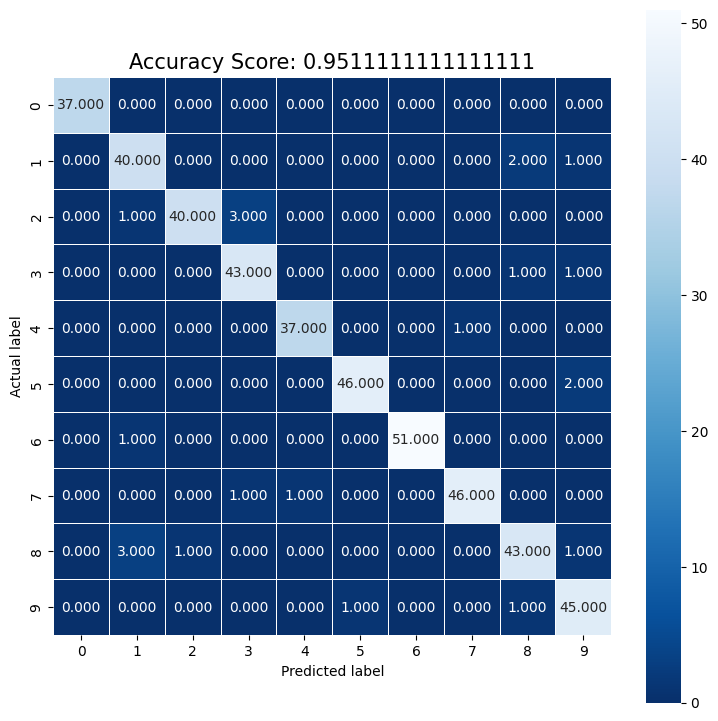

In [25]:
import numpy as np 
import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
plt.show();

In [27]:
#3.1.4 선형 회귀

In [27]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [28]:
dataset = pd.read_csv('../chap03/data/weather.csv')

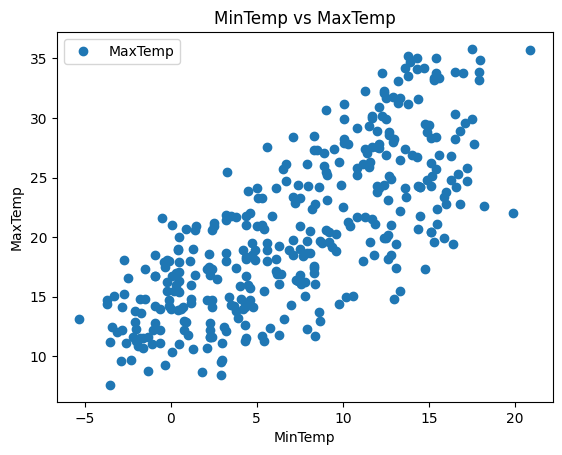

In [29]:
dataset.plot(x='MinTemp', y='MaxTemp', style='o')  
plt.title('MinTemp vs MaxTemp')  
plt.xlabel('MinTemp')  
plt.ylabel('MaxTemp') 
plt.show()

In [30]:
X = dataset['MinTemp'].values.reshape(-1,1)
y = dataset['MaxTemp'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [31]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,25.2,23.413030
1,11.5,13.086857
2,21.1,27.264856
3,22.2,25.461874
4,20.4,26.937041
...,...,...
69,18.9,20.216833
70,22.8,27.674625
71,16.1,21.446140
72,25.1,24.970151


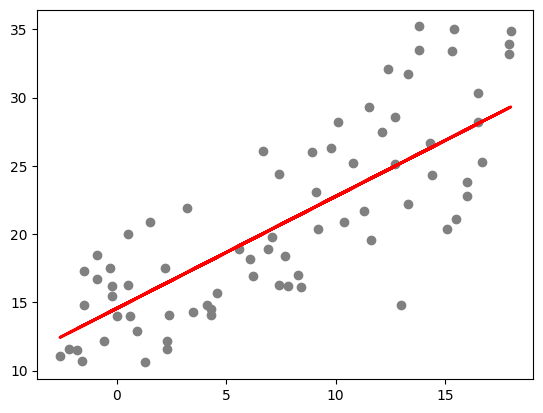

In [32]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [33]:
print('평균제곱법:', metrics.mean_squared_error(y_test, y_pred))  
print('루트 평균제곱법:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

평균제곱법: 17.011877668640622
루트 평균제곱법: 4.124545753006096


## 비지도 학습

In [ ]:
# 3.2.1 K=평균 군집화

In [26]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [27]:
data = pd.read_csv('../chap03/data/sales data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [28]:
#연속형 데이터와 명목형 데이터로 분류
categorical_features = ['Channel', 'Region']
continuous_features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

for col in categorical_features:
    dummies = pd.get_dummies(data[col], prefix=col)
    data = pd.concat([data, dummies], axis=1)
    data.drop(col, axis=1, inplace=True)
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3
0,12669,9656,7561,214,2674,1338,False,True,False,False,True
1,7057,9810,9568,1762,3293,1776,False,True,False,False,True
2,6353,8808,7684,2405,3516,7844,False,True,False,False,True
3,13265,1196,4221,6404,507,1788,True,False,False,False,True
4,22615,5410,7198,3915,1777,5185,False,True,False,False,True


In [29]:
# 교재 124 페이지 상단 > 모든 특성에 동일하게 중요성을 부여하기 위해 스케일링
mms = MinMaxScaler() # 일정한 범위를 유지
mms.fit(data)
data_transformed = mms.transform(data)

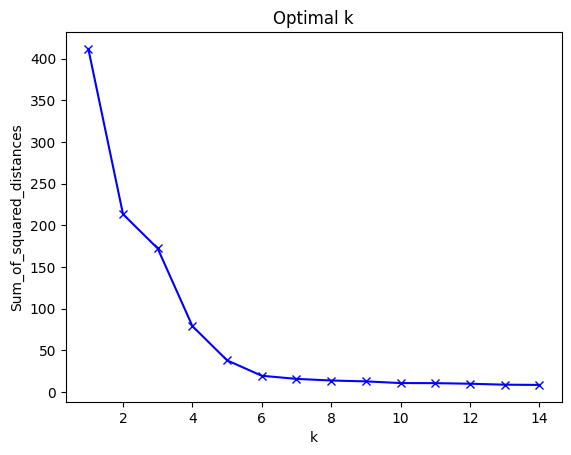

In [30]:
mms = MinMaxScaler()
mms.fit(data)
data_transformed = mms.transform(data)

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Optimal k')
plt.show()

군집화에서 자주 나오는 SSD(Sum of Squared Distances) 또는 **SSE(Sum of Squared Errors)**는 군집 내 거리 제곱의 합
- k-means 알고리즘의 목적: 각 데이터 포인트와 해당 소속 클러스터 중심점 사이의 거리 제곱합(SSD)을 최소화하는 것.
- 군집 수 k를 늘리면: 각 군집이 더 작고 밀집됨. > 각 데이터가 자기와 가까운 중심점에 할당되므로 거리 제곱이 작아짐.


클러스터링(군집화), https://wkddmswh99.tistory.com/6

- 좋은 군집화란?
    - ``군집 내`` 소속된 관측치들은 서로 유사할수록 좋다. 
    - ``군집 간`` 소속된 관측치들은 서로 다를수록 좋다. 
- k-means문제점
    1. 초기에 중심을 임의로 설정하게 되면, 초기 중심 설정에 따라 최종 군집 결과가 다르게 나타날 수도 있다.
    2. 서로 다른 크기의 군집을 잘 찾아내지 못한다. 
    3. 서로 다른 밀도의 군집을 잘 찾아내지 못한다.

In [31]:
#3.2.3 PCA 

- 주어진 데이터세트의 특성을 가장 잘 설명하는 새로운 변수(주성분)을 찾아내는 방법

차원 축소 - PCA, 주성분분석 (1) - EXCELSIOR - 티스토리, Excelsior-JH, 2018. 9. 1. 17:19,https://excelsior-cjh.tistory.com/167#google_vignette

- 데이터의 차원이 증가할수록 데이터 포인트 간의 거리 또한 증가하게 되므로, 이러한 데이터를 이용해 머신러닝 알고리즘을 학습 하게되면 모델이 복잡해지게 된다. 따라서, 오버피팅(overfitting) 위험이 커진다. 
- 차원 축소를 위한 접근방법
    - 매니폴드(manifold): 고차원을 저차원으로
- 주성분분석(PCA)
    - PCA는 데이터의 분산이 최대가 되는 축을 찾는다. = 2차원을 1차원으로 투영하면서 2차원의 분산이 가장 잘나타난 1차원

In [43]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
  
from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import normalize 
from sklearn.decomposition import PCA

In [44]:
X = pd.read_csv('../chap03/data/credit card.csv') 
X = X.drop('CUST_ID', axis = 1) 
X.fillna(method ='ffill', inplace = True) 
print(X.head())

       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                

In [45]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_normalized = normalize(X_scaled) 
X_normalized = pd.DataFrame(X_normalized)
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
print(X_principal.head())

         P1        P2
0 -0.489949 -0.679976
1 -0.519099  0.544827
2  0.330633  0.268880
3 -0.481657 -0.097610
4 -0.563512 -0.482506


밀도기반군집(density-based clustering), 뚜찌지롱 2021. 3. 5., https://syj9700.tistory.com/40

- 모수(Parameter)
    - ϵ(엡실론) : 데이터로부터의 반경(= ϵ-neighbirhood of x)
    - minPts : 군집을 구성하는데 필요한 최소의 데이터 수


- 분류 점(Point)
    - core point : 한 점의 ϵ-반경 내에 minPts 보다 많은 개체가 포함된 점.
    - border point : 한 점의 ϵ-반경 내에 minPts 보다 적은 개체을 포함하고 있지만, 적어도 하나의 코어점의 반경에 속하는 점.
    - noise point : 코어점 또는 경계점이 아닌 점으로, ϵ-반경 내에 minPts 보다 적은 수의 개체를 포함 하는 점

[바람돌이/머신러닝] 군집분석(Clustering)(4) - DBSCAN(Density-Based Clustering) 이론, 바람돌이 ・ 2020. 4. 7. 20:23,https://blog.naver.com/winddori2002/221896053297

In [46]:
db_default = DBSCAN(eps = 0.0375, min_samples = 3).fit(X_principal)
labels = db_default.labels_

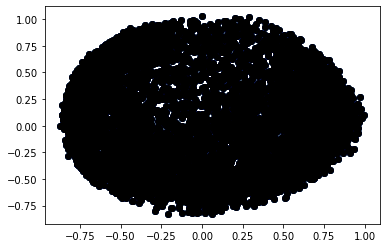

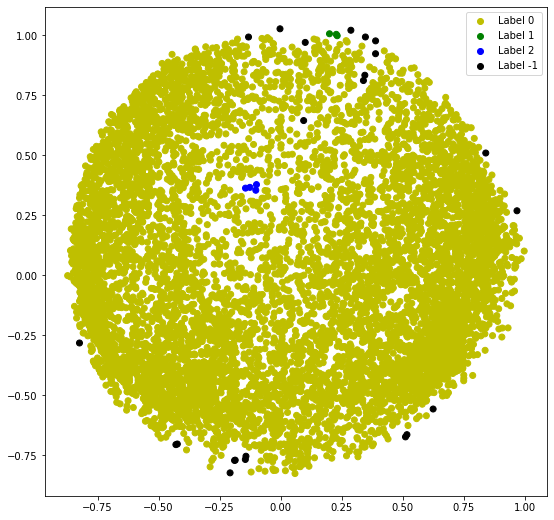

In [47]:
colours = {} 
colours[0] = 'y'
colours[1] = 'g'
colours[2] = 'b'
colours[-1] = 'k'
  
cvec = [colours[label] for label in labels]
  
r = plt.scatter(X_principal['P1'], X_principal['P2'], color ='y'); 
g = plt.scatter(X_principal['P1'], X_principal['P2'], color ='g'); 
b = plt.scatter(X_principal['P1'], X_principal['P2'], color ='b'); 
k = plt.scatter(X_principal['P1'], X_principal['P2'], color ='k'); 
  
plt.figure(figsize =(9, 9)) 
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec) 
  
plt.legend((r, g, b, k), ('Label 0', 'Label 1', 'Label 2', 'Label -1'))
plt.show()

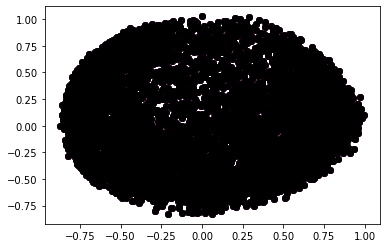

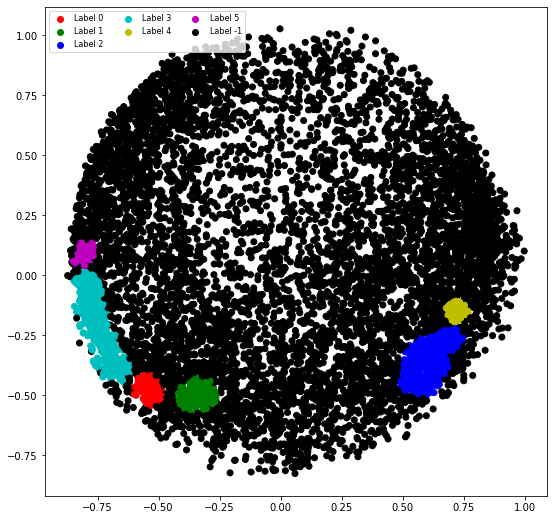

In [48]:
db = DBSCAN(eps = 0.0375, min_samples = 50).fit(X_principal) 
labels1 = db.labels_

colours1 = {} 
colours1[0] = 'r'
colours1[1] = 'g'
colours1[2] = 'b'
colours1[3] = 'c'
colours1[4] = 'y'
colours1[5] = 'm'
colours1[-1] = 'k'
  
cvec = [colours1[label] for label in labels1] 
colors1 = ['r', 'g', 'b', 'c', 'y', 'm', 'k' ] 
  
r = plt.scatter(
    X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[0]) 
g = plt.scatter( 
    X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[1]) 
b = plt.scatter( 
    X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[2]) 
c = plt.scatter( 
    X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[3]) 
y = plt.scatter( 
    X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[4]) 
m = plt.scatter( 
    X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[5]) 
k = plt.scatter( 
    X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[6]) 
  
plt.figure(figsize =(9, 9)) 
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec) 
plt.legend((r, g, b, c, y, m, k), 
           ('Label 0', 'Label 1', 'Label 2', 'Label 3', 'Label 4', 'Label 5', 'Label -1'), 
           scatterpoints = 1, 
           loc ='upper left', 
           ncol = 3, 
           fontsize = 8) 
plt.show()


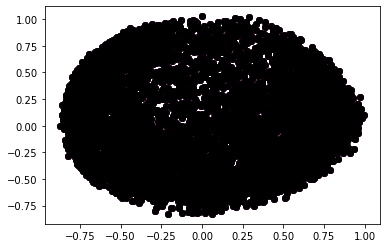

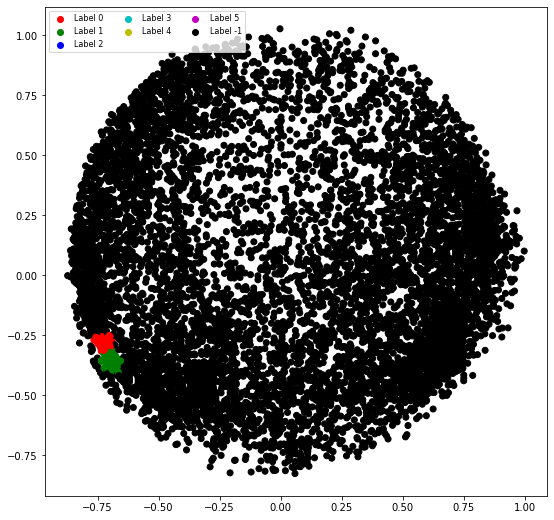

In [49]:
db = DBSCAN(eps = 0.0375, min_samples = 100).fit(X_principal)
labels1 = db.labels_

colours1 = {} 
colours1[0] = 'r'
colours1[1] = 'g'
colours1[2] = 'b'
colours1[3] = 'c'
colours1[4] = 'y'
colours1[5] = 'm'
colours1[-1] = 'k'
  
cvec = [colours1[label] for label in labels1] 
colors1 = ['r', 'g', 'b', 'c', 'y', 'm', 'k' ] 
  
r = plt.scatter(
    X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[0]) 
g = plt.scatter( 
    X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[1]) 
b = plt.scatter( 
    X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[2]) 
c = plt.scatter( 
    X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[3]) 
y = plt.scatter( 
    X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[4]) 
m = plt.scatter( 
    X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[5]) 
k = plt.scatter( 
    X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[6]) 
  
plt.figure(figsize =(9, 9)) 
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec) 
plt.legend((r, g, b, c, y, m, k), 
           ('Label 0', 'Label 1', 'Label 2', 'Label 3', 'Label 4', 'Label 5', 'Label -1'), 
           scatterpoints = 1, 
           loc ='upper left', 
           ncol = 3, 
           fontsize = 8) 
plt.show()
